---

# Cancer Survivability Prediction

---

## Table of Contents
---
1. [Introduction](#introduction)
2. [Key Questions](#keyquestions)
3. [Methods Used for Analysis](#methods)
    -[Loading Libraries](#libs)
4. [Data Set](#dataset)
    - [Data Dictionary](#dict)
5. [Initial Data Cleaning](#cleaning)
    - [Plan of Action](#action)
    - [Data Loading](#load)
    - [Data Assessment](#assess)
    - [Handling Missing Values](#missing)
6. [Findings Summary](#findings)
    - [Next Steps](#next)


## Introduction <a class="anchor" id="introduction"></a>
---

The goal of this project is to build a machine learning model to accurately predict the prognosis i.e. the survivability of various cancers using key demographic and tumour specific indicatiors.  The goal is to generate a more accurate prognosis to allow physicians to better inform their patients of thier cancer prognosis and overall survivability.  The ultimate use of this would allow for improved pateint care, better resource management, identifying patients for clinical trials and an overall increase in a patient's quality of life.

## Key Questions <a class="anchor" id="keyquestions"></a>
---

This analysis of this data set attempts to answer the following questions:

- Using Machine Learning, are we able to accurately predict prognosis and overall survivability for pateints with cancer - using various demographic and cancer specific features?

We will use this throughout the analysis to explore the relationships between key featues and gather insights about data derived from the cBioPortal for Cancer genomics: MSK MetTropism (MSK, Cell 2021) study


## Methods Used for Analysis <a class="anchor" id="methods"></a>
---

I used `Python 3` in `Jupyter Lab` and its associated libraries:
 - Pandas
- Matplotlib
- Numpy
- Seasborn

We will load necesssary libraries below. More libraries will be loaded as needed for analysis.

### Loading the Necessary Libraries <a class="anchor" id="load"></a>

In [104]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm


## Data Set <a class="anchor" id="dataset"></a>
---
For this proejct, we will be using the MSK MetTropism data set collected at the Memorial Sloan Kettering Cancer Centre in New York, USA during the MSK Cell 2021 study. This data set contains information on patient demographics(such as age, gender, race) and cancer specific features. 

### Data Dictionary <a class="anchor" id="dict"></a>

To help with the analysis, study the data dictionary below.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Description</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>Study ID</code> </td>
    <td style="text-align: left">ID for the Study where the data is from</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Patient ID</code></td>
    <td style="text-align: left">Unique patient identifier</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Sample ID</code></td>
    <td style="text-align: left">Unique sample identifier</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Age at Death</code></td>
    <td style="text-align: left">Age at which patient died (blank indicated patient is alive at time of study)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Age at First Mets Dx</code></td>
    <td style="text-align: left">Age at which patient was diagnosed with metastatic cancer</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Age at Last Contact</code></td>
    <td style="text-align: left">Age at which the study made last contact with the patient</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Age at Sequencing</code></td>
    <td style="text-align: left">Age at which the patients tumour was genetically sequenced</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Age at Surgical Procedure</code></td>
    <td style="text-align: left">Age at which patentee underwent surgery to remove tumour</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Cancer Type</code></td>
    <td style="text-align: left">Type of cancer at diagnosis</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Cancer Type Detailed</code></td>
    <td style="text-align: left">Detailed description of cancer type</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Adrenal Gland</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the Adrenal Gland</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Biliary tract</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the Biliary tract </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Bladder/UT</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the Bladder/Urinary Tract </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Bone</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in Bone </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Bowel</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the Bowel</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Breast</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the Breast tissue</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: CNS/Brain</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the Central Nervous System(spinal cord)/Brain </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Distant LN</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in distant Lymph Nodes</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Female Genital</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in female genitalia</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Head and Neck</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the head or neck</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Intra-Abdominal</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the intra abdominal area</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Kidney</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the kidneys</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Liver</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the liver </td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Lung</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the lungs</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Male Genital</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the male genitalia</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Mediastinum</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the mediastinum</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Ovary</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the ovaries</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Pleura</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in pleural tissue</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: PNS</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the peripheral nervous system</td>
  </tr>
   <tr>
    <td style="text-align: left"><code>Distant Mets: Skin</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in the skin </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Distant Mets: Unspecified</code></td>
    <td style="text-align: left">Presence or absence of distant Metastasis at Diagnosis in unspecified regions</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>FGA</code></td>
    <td style="text-align: left">Fraction Genome Altered (rounded)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Fraction Genome Altered</code></td>
    <td style="text-align: left">Fraction Genome Altered indicates the fraction of the genome that is copy-number altered. Add the length of all copy-number segments with an absolute value greater than 0.1 and then divide that number by the length of the genome. The resulting number is a fraction.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Gene Panel</code></td>
    <td style="text-align: left">ID of the gene panel used for genetic sequencing</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Metastatic patient</code></td>
    <td style="text-align: left">True or False: if patient had metastatic disease or not</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Metastatic Site</code></td>
    <td style="text-align: left">The anatomic location where tumour has spread</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Met Count</code></td>
    <td style="text-align: left">Number of metastasis found</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Met Site Count</code></td>
    <td style="text-align: left">Number of different metastatic sites</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>MSI Score</code></td>
    <td style="text-align: left">Numerical value of the amount of Microsatellite Instability found in the tumour</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>MSI Type</code></td>
    <td style="text-align: left">Does tutor exhibit Microsatellite Instability</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Mutation Count</code></td>
    <td style="text-align: left">Number of gene mutations found</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Oncotree Code</code></td>
    <td style="text-align: left">The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Organ System</code></td>
    <td style="text-align: left">Organ System where the cancer was found</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Overall Survival (Months)</code></td>
    <td style="text-align: left">Number of months that patient survived from initial diagnosis</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Overall Survival Status</code></td>
    <td style="text-align: left">Survival status: 0:LIVING, 1:DECEASED</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Primary Tumor Site</code></td>
    <td style="text-align: left">The organ sub-division where the primary tumour was found</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Race Category</code></td>
    <td style="text-align: left">Patient information about race</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Number of Samples Per Patientn</code></td>
    <td style="text-align: left">Number of samples taken per patient in the study</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Sample coverage</code></td>
    <td style="text-align: left">The number of unique sequencing reads that align to a region in a reference genome</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Sample Type</code></td>
    <td style="text-align: left">Primary tumour or metastasis</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Sex</code></td>
    <td style="text-align: left">Biological gender at birth</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Subtype</code></td>
    <td style="text-align: left">Cancer subtype</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Subtype Abbreviation</code></td>
    <td style="text-align: left">Cancer subtype abbreviation</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>TMB (nonsynonymous)</code></td>
    <td style="text-align: left">The number of non-synonymous mutations within coding regions across the genome. Non-synonymous mutations alter coding regions and change the resulting protein into dysfunctional or malformed protein products.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Tumor Purity</code></td>
    <td style="text-align: left">The proportion of tumour cells in the tumour micro environment (TME)</td>
  </tr>
</table>

In [105]:
#load the data dictionary
feature_df = pd.read_csv('data_dictionary.csv', index_col = 'Column')

In [106]:
#how many features do we have
feature_df.shape[0]

55

**Observations:** 

There are 55 features that are described in the data dictionary. It has been loaded as a pandas dataframe so we can call on the descriptions when needed during the analysis

In [107]:
feature_df

,Description
Column,
Study ID,ID for the Study where the data is from
Patient ID,Patient identifier (some patients may have mul...
Sample ID,Unique sample identifier
Age at Death,Age at which patient died (blank indicated pat...
Age at First Mets Dx,Age at which patient was diagnosed with metast...
Age at Last Contact,Age at which the study made last contact with ...
Age at Sequencing,Age at which the patients tumour was genetical...
Age at Surgical Procedure,Age at which patentee underwent surgery to rem...
Cancer Type,Type of cancer at diagnosis


In [108]:
#test fature information lookup
print(feature_df.loc['Age at Death']['Description'])


Age at which patient died (blank indicated patient is alive at time of study)


#### Feature Information Lookup:

I have defined a function that allows us to look up feature information from the data dictionary as we need to during analysis. This function uses an input of the feature name and returns the corresponding description.

In [109]:
#Feature information lookup function
def feature_information(col_name):
    
    '''
    Description:
    -------------
    Feature lookup function - 
    Prints the description of a feature in the data set
    
    Parameters:
    -----------
    col_name = string of the name of the column (feature) in the data set
    Examples: 
        'Patient ID'
        'Age at Death'
    
    Examples:
    ---------
    feature_information('Cancer Type')
    Returns: 
        "Cancer Type: Type of cancer at diagnosis"
    
    ----------------------------------
    feature_information('Age at Death')
    Returns:
        "Age at Death: Age at which patient died (blank indicated patient is alive at time of study)"
    
    
    '''
    print(f"{col_name}: {feature_df.loc[col_name]['Description']}")

In [110]:
#test feature_information lookup function
feature_information('Cancer Type')

Cancer Type: Type of cancer at diagnosis


In [111]:
#test feature_information lookup function
help(feature_information)

Help on function feature_information in module __main__:

feature_information(col_name)
    Description:
    -------------
    Feature lookup function - 
    Prints the description of a feature in the data set
    
    Parameters:
    -----------
    col_name = string of the name of the column (feature) in the data set
    Examples: 
        'Patient ID'
        'Age at Death'
    
    Examples:
    ---------
    feature_information('Cancer Type')
    Returns: 
        "Cancer Type: Type of cancer at diagnosis"
    
    ----------------------------------
    feature_information('Age at Death')
    Returns:
        "Age at Death: Age at which patient died (blank indicated patient is alive at time of study)"



## Initial Data Cleaning <a class="anchor" id="cleaning"></a>
---


### Plan of action <a class="anchor" id="action"></a>

1. Data Loading
2. Initial Data Assessment
2. Data Cleaning
    - Dealing with duplicated values
    - Dealing with redundant columns
    - Dealing with null values
3. EDA 
4. Draw insights
5. Formulate a conclusion

### Data Loading <a class="anchor" id="load"></a>


In [112]:
#load the data set
df = pd.read_csv('Capstone_data.csv')

### Data Assesment <a class="anchor" id="assess"></a>
---

In [113]:
#Display max columns and rows so we can visualize the entire data set if needed.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

First lets take a look at the number of rows and columns in this data set

In [114]:
# Check the shape of the data:
df.shape

(25775, 55)

**Observations:**

There are 25,775 rows and 55 columns in this dataset

---


Next let familiarize ourselves with the data by checking th information contained in the first 5 columns

In [115]:
df.head()

,Study ID,Patient ID,Sample ID,Age at Death,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,FGA,Fraction Genome Altered,Gene Panel,Metastatic patient,Metastatic Site,Met Count,Met Site Count,MSI Score,MSI Type,Mutation Count,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity
0,msk_met_2021,P-0000004,P-0000004-T01-IM3,40.06,39.66,NaN,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,0.278,0.2782,IMPACT341,True,NaN,2,2,2.50,Stable,4.0,IDC,Breast,3.78,1:DECEASED,Breast,White,1,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0
1,msk_met_2021,P-0000015,P-0000015-T01-IM3,45.60,44.25,NaN,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,0.350,0.3503,IMPACT341,True,Liver,8,8,2.55,Stable,7.0,IDC,Breast,13.90,1:DECEASED,Breast,White,1,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0
2,msk_met_2021,P-0000024,P-0000024-T01-IM3,64.25,59.44,NaN,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.388,0.3878,IMPACT341,True,Lung,8,5,0.72,Stable,6.0,UEC,Gynecologic,35.06,1:DECEASED,Uterus,White,1,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0
3,msk_met_2021,P-0000025,P-0000025-T02-IM5,76.53,69.65,NaN,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,0.102,0.1020,IMPACT410,True,Intra-Abdominal,13,8,0.15,Stable,2.0,USC,Gynecologic,46.00,1:DECEASED,Uterus,White,1,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0
4,msk_met_2021,P-0000026,P-0000026-T01-IM3,NaN,68.41,78.43,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.420,0.4196,IMPACT341,True,Unspecified,11,7,1.23,Stable,4.0,UEC,Gynecologic,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0


Next Steps:
- Check data types and formats
- Check for duplicates
- Check missing data

---


Next lets check the data types and formats of the 55 columns in this data set using the .info() function

In [116]:
#Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25775 entries, 0 to 25774
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       25775 non-null  object 
 1   Patient ID                     25775 non-null  object 
 2   Sample ID                      25775 non-null  object 
 3   Age at Death                   10023 non-null  float64
 4   Age at First Mets Dx           19638 non-null  float64
 5   Age at Last Contact            15646 non-null  float64
 6   Age at Sequencing              25517 non-null  float64
 7   Age at Surgical Procedure      24953 non-null  float64
 8   Cancer Type                    25775 non-null  object 
 9   Cancer Type Detailed           25775 non-null  object 
 10  Distant Mets: Adrenal Gland    25775 non-null  object 
 11  Distant Mets: Biliary tract    25775 non-null  object 
 12  Distant Mets: Bladder/UT       25775 non-null 

**Observations:**

This data set contains the following data types:

- `bool` (1)
- `float64`(12)
- `int64`(4)
- `obect`(38)

There seems to be columns with null values which we will take care of shortly.

---

Next we will take a look at the number duplicate rows in the dataframe

In [117]:
#Check the number of duplicated rows
df.duplicated().sum()

0

**Observations:**

There are no duplicated rows in this data frame. 

---


Next we will take a look if any columns are duplicated by transposing the dataframe and running the duplicated function from above

In [118]:
# Transpose the data frame and then look for duplicated rows to determine if any of the columns are duplicated:
df.T.duplicated().sum()

0

**Observations:**

There are no duplicated columns in this data frame. 

---

Even though there are no duplicated columns, there could be numerical columns that are fully correlated but do not contain the same values. Lets visualize this with a heatmap of correlations. 

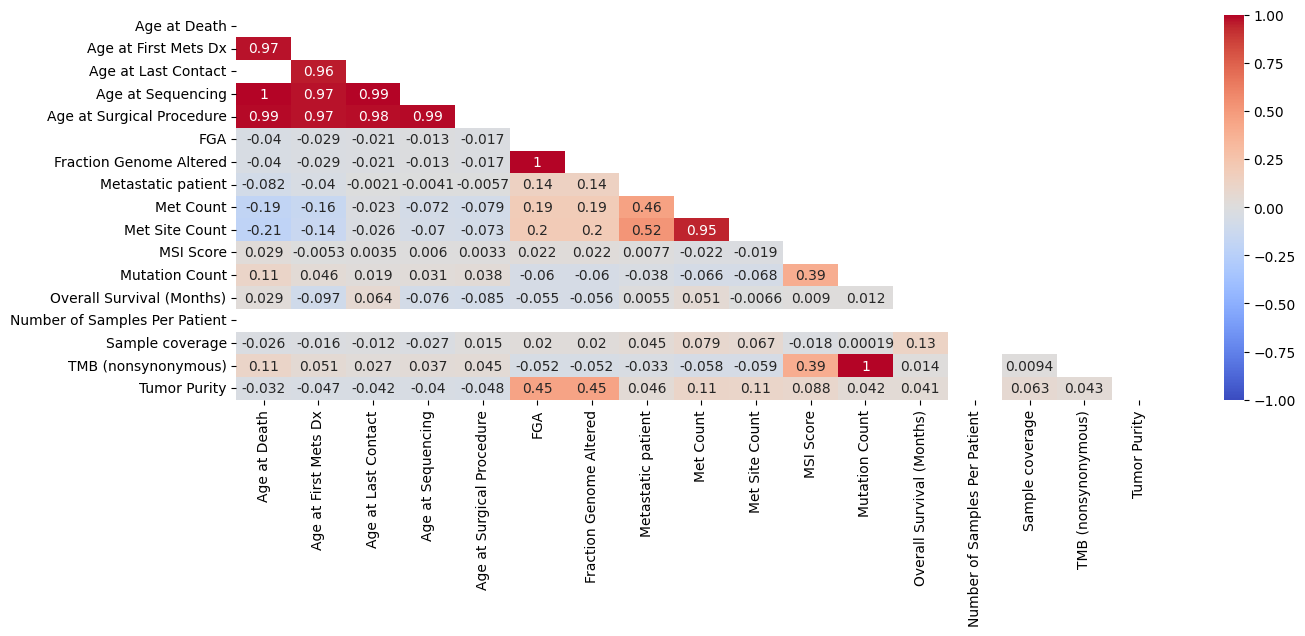

In [119]:
#Create a heatmap of correlations to check if any columns are fully correlated

corr_df = df.corr(numeric_only=True)
mask = np.triu(corr_df)

plt.figure(figsize=(15, 5))
sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, annot=True, mask=mask, cmap='coolwarm')
plt.show()

**Observations:**

There are quite a few columns that have high correlation and we will take care of these when it comes time to modeling.  

As you can see in the heatmap however, there some features that have a full correlation with others:
- `Mutation Count` is fully correlated with `TMB (nonsynonymous)`
- `Fraction Genome Altered` is fully correlated with `FGA`
- `Age at Death` is fully correlated with `Age at Squencing`

Lets further investigate what information these columns contain

---

Investigate the fully correlated columns:
- `Mutation Count` vs `TMB (nonsynonymous)`

In [120]:
#check description for Mutation Count
feature_information('Mutation Count')

Mutation Count: Number of gene mutations found


In [121]:
#check description for TMB (nonsynonymous)
feature_information('TMB (nonsynonymous)')

TMB (nonsynonymous): The number of non-synonymous mutations within coding regions across the genome. Non-synonymous mutations alter coding regions and change the resulting protein into dysfunctional or malformed protein products.


In [122]:
#check null values in these columns to determine if one is better to drop than the other
df[['Mutation Count','TMB (nonsynonymous)']].isna().sum()

Mutation Count         1022
TMB (nonsynonymous)       0
dtype: int64

In [123]:
#check if the null values in Mutation Count = to a value of 0 in TMB (nonsynonymous)
specific_value = 0

filtered_rows = df[(df['Mutation Count'].isna()) & (df['TMB (nonsynonymous)'] == specific_value)]
filtered_rows.shape

(1022, 55)

**Observations:**

Since `Mutation Count` and `TMB (nonsynonymous)` both describe a value for the number of mutations specified in a patient, they are fully correlated. Though they might indicate different values for a patient,  `TMB (nonsynoymous)` looks at the coding regions and therefore is more informative than `Mutation Count`.  We will drop the `Mutation Count` column as it gives less valuable information.

As another check, we checked the null values in each column as this may help guide which to drop contains null values where the `TMB (nonsynoymous)` feature does not contain null values.  As seen in the above codes, when `TMB(nonsynonymous) = 0`, `Mutation Count = NaN`. 

With these observations, we can drop the `Mutation Count` column.

---

Investigate the fully correlated columns:
- `Fraction Genome Altered` vs `FGA`    
    

In [124]:
#check description for Fraction Genome Altered
feature_information('Fraction Genome Altered')

Fraction Genome Altered: Fraction Genome Altered indicates the fraction of the genome that is copy-number altered. Add the length of all copy-number segments with an absolute value greater than 0.1 and then divide that number by the length of the genome. The resulting number is a fraction.


In [125]:
#check description for FGA
feature_information('FGA')

FGA: Fraction Genome Altered (rounded)


In [126]:
#check the null values for each of these columns
df[['Fraction Genome Altered','FGA']].isna().sum()

Fraction Genome Altered    0
FGA                        0
dtype: int64

**Observations:**

`Fraction Genome Altered` and `FGA` contain the same information, `FGA` is a rounded version of this column. We can see that neither have null values. Since `Fraction Genome Altered` is not rounded and remains a 'fraction' we will keep this column as it provides more information and we will drop `FGA`.

---


Investigate the fully correlated columns:

- `Age at Death` is fully correlated with `Age at Squencing`

In [127]:
#check the description for Age at Death
feature_information('Age at Death')

Age at Death: Age at which patient died (blank indicated patient is alive at time of study)


In [128]:
#check the description for Age at Sequencing
feature_information('Age at Sequencing')

Age at Sequencing: Age at which the patients tumour was genetically sequenced


In [129]:
#check the null values for each of these columns

df[['Age at Death','Age at Sequencing']].isna().sum()

Age at Death         15752
Age at Sequencing      258
dtype: int64

In [130]:
#check a related column Overall Survival Status:

df['Overall Survival Status'].value_counts()

Overall Survival Status
0:LIVING      15606
1:DECEASED    10169
Name: count, dtype: int64

**Observations:**

`Age at Death` and `Age at Sequencing` are fully correlated so one need to be dropped. They represent different ages in the span of the study.  When looking at the null values, `Age at Death` has a high number of null values.  This is because if the patient was stilla live during the entire study, no age was recorded.  This information is then captured in `Overall Survival Status`.  As it would be difficult to have any utility with the `Age at Death` feature with such a high proportion of Null values, we will drop this column. Note: Though there are 146 Null values in the `Age at Death` column that are unaccounted for in the `Overall Survival Status` column, this can be attirbuted to a data entry error. 

---

Next I want to investigate `Number of Samples per Patient` as this value does not appear in our correlation heatmap. All values are blank. Lets see what values this column contains.

In [131]:
df['Number of Samples Per Patient'].value_counts()

Number of Samples Per Patient
1    25775
Name: count, dtype: int64

**Observations:**

As we can see there is only one value for this column which is why there was no correlation value in the heat map.  The entire data set only includes 1 sample per patient.  We can drop this column as it will not have any utility in our modeling.

---

Now that we have investigated the features that are fully correlated and decided which to drop, we can go ahead and drop these columns and then move on to dealing with missing values.  We will drop these columns in a copy of the data frame so that we can use the original data later if needed. Lets recap the columns we will be dropping:

- `Mutation Count`
- `FGA`
- `Age at Death`
- `Number of Samples Per Patient`

In [132]:
#make a copy of our data frame
df_2 = df.copy()

#make a list of the columns to drop
cols_to_drop =['Mutation Count', 'FGA', 'Age at Death', 'Number of Samples Per Patient']

#drop the columns
df_2.drop(cols_to_drop, axis=1, inplace=True)

In [133]:
#sanity check
df_2.head()

,Study ID,Patient ID,Sample ID,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Gene Panel,Metastatic patient,Metastatic Site,Met Count,Met Site Count,MSI Score,MSI Type,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity
0,msk_met_2021,P-0000004,P-0000004-T01-IM3,39.66,NaN,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,0.2782,IMPACT341,True,NaN,2,2,2.50,Stable,IDC,Breast,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0
1,msk_met_2021,P-0000015,P-0000015-T01-IM3,44.25,NaN,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,0.3503,IMPACT341,True,Liver,8,8,2.55,Stable,IDC,Breast,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0
2,msk_met_2021,P-0000024,P-0000024-T01-IM3,59.44,NaN,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.3878,IMPACT341,True,Lung,8,5,0.72,Stable,UEC,Gynecologic,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0
3,msk_met_2021,P-0000025,P-0000025-T02-IM5,69.65,NaN,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,0.1020,IMPACT410,True,Intra-Abdominal,13,8,0.15,Stable,USC,Gynecologic,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0
4,msk_met_2021,P-0000026,P-0000026-T01-IM3,68.41,78.43,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.4196,IMPACT341,True,Unspecified,11,7,1.23,Stable,UEC,Gynecologic,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0


In [134]:
#check the shape of the new data frame after the 4 columns were dropped
df_2.shape[1]

51

The new data set with the removed columns has 51 columns.

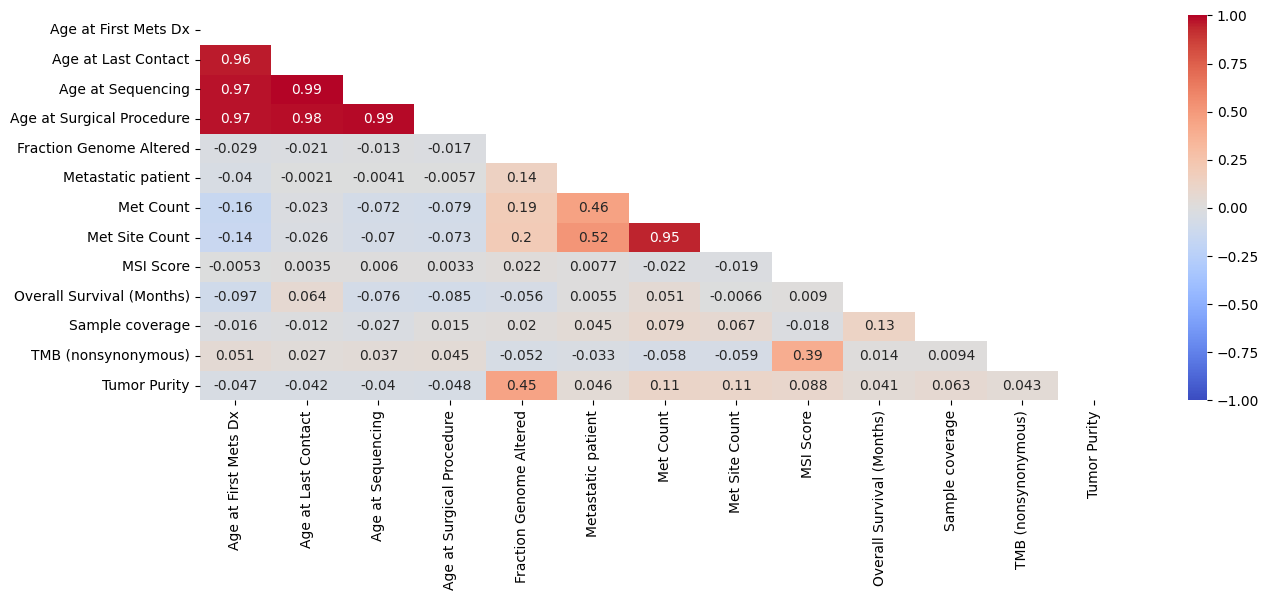

In [135]:
#re-Create a heatmap of correlations to check if any columns are fully correlated

corr_df2 = df_2.corr(numeric_only=True)
mask = np.triu(corr_df2)

plt.figure(figsize=(15, 5))
sns.heatmap(corr_df2, vmin=-1.0, vmax=1.0, annot=True, mask=mask, cmap='coolwarm')
plt.show()

**Observations:**

The columns that were full correlated have been removed and now we can move on to dealing with null values in the remainder of the data set.

---

Next steps:

- Check columns for unique values to see if there are insignificant columns that can be dropped
- Check columns for missing values
- Deal with missing values

In [136]:
#Check number of unique values in each column of the dataset
df_2.nunique()

Study ID                             1
Patient ID                       25775
Sample ID                        25775
Age at First Mets Dx              5296
Age at Last Contact               4972
Age at Sequencing                 5595
Age at Surgical Procedure         5618
Cancer Type                         27
Cancer Type Detailed                84
Distant Mets: Adrenal Gland          2
Distant Mets: Biliary tract          2
Distant Mets: Bladder/UT             2
Distant Mets: Bone                   2
Distant Mets: Bowel                  2
Distant Mets: Breast                 2
Distant Mets: CNS/Brain              2
Distant Mets: Distant LN             2
Distant Mets: Female Genital         2
Distant Mets: Head and Neck          2
Distant Mets: Intra-Abdominal        2
Distant Mets: Kidney                 2
Distant Mets: Liver                  2
Distant Mets: Lung                   2
Distant Mets: Male Genital           2
Distant Mets: Mediastinum            2
Distant Mets: Ovary      

Nex I will take a look at the data in the following columns:

- `Patient ID` vs `Sample ID`: as they have the same amount of unique values as number of entries in the data set
- `Study ID`: There is only one unique value in this column

In [137]:
df_2[['Patient ID', 'Sample ID']].head()

,Patient ID,Sample ID
0,P-0000004,P-0000004-T01-IM3
1,P-0000015,P-0000015-T01-IM3
2,P-0000024,P-0000024-T01-IM3
3,P-0000025,P-0000025-T02-IM5
4,P-0000026,P-0000026-T01-IM3


In [138]:
df['Study ID'].value_counts()

Study ID
msk_met_2021    25775
Name: count, dtype: int64

**Observations:**

`Patient ID` and `Sample ID` seem to both have very similar information. `Sample ID` contains the `Patient ID` string followed by another string which must be an ID for a process that the sample went through for analysis.  Since `Sample ID` contains more information and is also a unique value for each entry, we can drop the redundant column `Patient ID`.  

`Study ID` contains only one value msk_met_2021.  This is not useful information for us as we know from the data source what study this data belongs to. To keep our data as clean as possible keeping only significant information, we can also drop this column.

In [139]:
#make a list of columns to drop
cols_to_drop =['Patient ID', 'Study ID']

#drop the columns
df_2.drop(cols_to_drop, axis=1, inplace=True)

In [140]:
#sanity check
df_2.head()

,Sample ID,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Gene Panel,Metastatic patient,Metastatic Site,Met Count,Met Site Count,MSI Score,MSI Type,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity
0,P-0000004-T01-IM3,39.66,NaN,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,0.2782,IMPACT341,True,NaN,2,2,2.50,Stable,IDC,Breast,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0
1,P-0000015-T01-IM3,44.25,NaN,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,0.3503,IMPACT341,True,Liver,8,8,2.55,Stable,IDC,Breast,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0
2,P-0000024-T01-IM3,59.44,NaN,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.3878,IMPACT341,True,Lung,8,5,0.72,Stable,UEC,Gynecologic,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0
3,P-0000025-T02-IM5,69.65,NaN,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,0.1020,IMPACT410,True,Intra-Abdominal,13,8,0.15,Stable,USC,Gynecologic,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0
4,P-0000026-T01-IM3,68.41,78.43,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.4196,IMPACT341,True,Unspecified,11,7,1.23,Stable,UEC,Gynecologic,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0


In [141]:
df_2.shape[1]

49

We are now left with 49 columns

### Handling Missing Values <a class="anchor" id="missing"></a>

In [142]:
#check for missing values:

In [143]:
null_counts = df_2.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

Age at First Mets Dx          6137
Age at Last Contact          10129
Age at Sequencing              258
Age at Surgical Procedure      822
Metastatic Site              15632
MSI Score                        2
MSI Type                         1
Overall Survival (Months)      116
Primary Tumor Site               2
Race Category                   77
Sex                              4
Tumor Purity                   407
dtype: int64

In [144]:
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df_2.shape[0]*100
percentage_nulls

Age at First Mets Dx         23.809893
Age at Last Contact          39.297769
Age at Sequencing             1.000970
Age at Surgical Procedure     3.189137
Metastatic Site              60.647915
MSI Score                     0.007759
MSI Type                      0.003880
Overall Survival (Months)     0.450048
Primary Tumor Site            0.007759
Race Category                 0.298739
Sex                           0.015519
Tumor Purity                  1.579049
dtype: float64

**Observations:**

There are some columns with quite a high percentage of missing values.  Lets investigate the 3 columns that have >10% of values missing to see what information they provide so we can determine how to deal with these missing values:
- `Age at First Mets Dx`: ~24% missing
- `Age at Last Contact`: ~39% missing
- `Metastatic Site`: ~61% missing


As we can see from above, there are alot of missing values in the Age columns. I will be dropping some of these columns but prior to doing this I will create a new column that takes the average age across all age columns to preserve some of this information in case it is needed for modeling. This will be the average age of the patient during the study.

---

In [145]:
# take the average age across each age column from the original dataframe and add it into the new data frame
df_2['Average Age'] = df[['Age at First Mets Dx', 'Age at Last Contact', 'Age at Sequencing', 'Age at Surgical Procedure', 'Age at Death']].mean(axis=1)

In [146]:
#check the amount of null values in our new column
df_2['Average Age'].isna().sum()

101

**Observations:**

I created a new column `Average Age` that takes into account all the age columns from the original data frame so when we drop columns with a high amount of null values there still remains some of that age information. There are only 101 null values in this column, meaning there were some patients that had no age information input in the data set.  For these nulls, since this meant there is no age information, we can fill them in with the mean of the `Average Age` column as this will have minimal affect on the distribution.

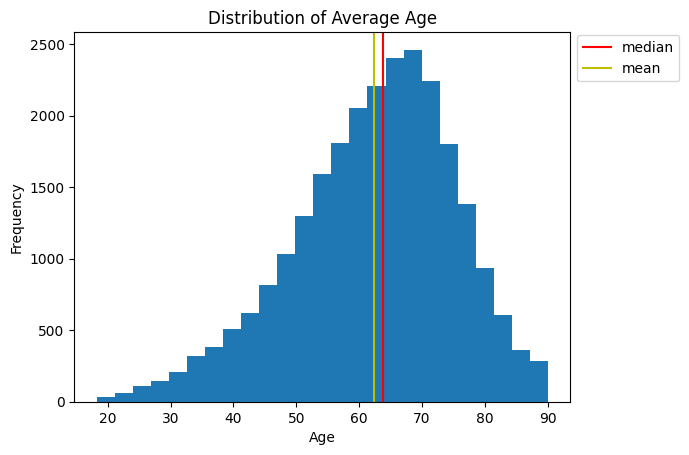

In [147]:
#show the distribution of the average age column:

plt.figure()
plt.hist(df_2['Average Age'], bins = 25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Average Age')
plt.axvline(df_2['Average Age'].median(), label='median', color='r')
plt.axvline(df_2['Average Age'].mean(), label='mean', color='y')

plt.legend(bbox_to_anchor=(1, 1.01), loc='upper left')
plt.show()

The average age column is normally distributed with a left/negative skew.  We will fill in the null values with the mean and revisualize the distribution to make sure it has not changed much

In [148]:
#take the mean of the average age column
mean_age = df_2['Average Age'].mean()

# Fill null values with the mean
df_2['Average Age'].fillna(mean_age, inplace=True)

In [149]:
#sanity check
df_2['Average Age'].isna().sum()

0

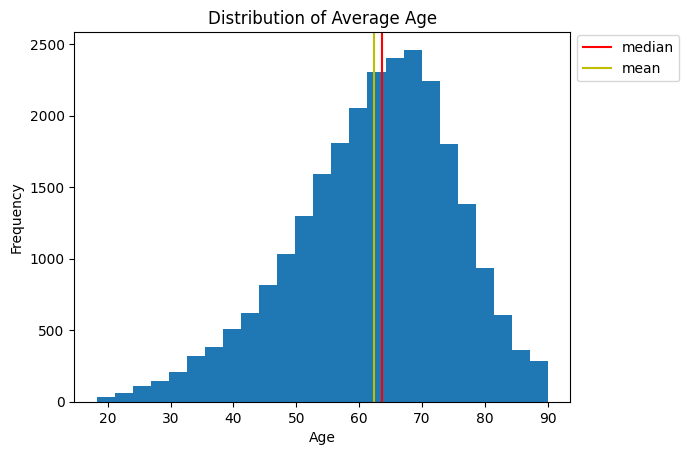

In [150]:
# re-visualize distribution
plt.figure()
plt.hist(df_2['Average Age'], bins = 25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Average Age')
plt.axvline(df_2['Average Age'].median(), label='median', color='r')
plt.axvline(df_2['Average Age'].mean(), label='mean', color='y')

plt.legend(bbox_to_anchor=(1, 1.01), loc='upper left')
plt.show()

**Observations:**

The distribution appears to look the same visually as the original distribution so we will continue on to taking care of the rest of the null values.

---

We will start with `Age at First Mets Dx`

In [151]:
feature_information('Age at First Mets Dx')

Age at First Mets Dx: Age at which patient was diagnosed with metastatic cancer


In [152]:
#check the number of null values in this columndd
df_2['Age at First Mets Dx'].isna().sum()

6137

In [153]:
#check the information of a similar column which may capture the information of the column we would like to drop'
feature_information('Metastatic patient')

Metastatic patient: Bool of if patient had metastatic disease or not


In [154]:
df_2['Metastatic patient'].value_counts()

Metastatic patient
True     21546
False     4229
Name: count, dtype: int64

In [155]:
df_2['Metastatic patient'].isna().sum()

0

**Observations:**

`Age at First Mets Dx` has ~24% missing values. The information in this column is not useful with this many missing values. We can choose to drop as the majority of these null values are due to these patients not having metastatic disease. We can not fill this value in with a value as this would disrupt our model as there is no age at which they had metastatic disease if they were never diagnosed with such. Since this column has so many null values, filling it with an age that is not  is Therefore we will drop the `Age at First Mets Dx` column from the data frame as the important information is captured in `Metastatic patient`.

Next will look at `Age at Last Contact`

In [156]:
feature_information('Age at Last Contact')

Age at Last Contact: Age at which the study made last contact with the patient


In [157]:
#check the number of null values
df_2['Age at Last Contact'].isna().sum()

10129

In [158]:
#Check only patients that are deceased & Age at last contact is null
specific_value = '1:DECEASED'

filtered_deceased = df_2[(df_2['Age at Last Contact'].isna()) & (df_2['Overall Survival Status'] == specific_value)]
filtered_deceased.head()

,Sample ID,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Gene Panel,Metastatic patient,Metastatic Site,Met Count,Met Site Count,MSI Score,MSI Type,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity,Average Age
0,P-0000004-T01-IM3,39.66,NaN,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,0.2782,IMPACT341,True,NaN,2,2,2.50,Stable,IDC,Breast,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0,39.1225
1,P-0000015-T01-IM3,44.25,NaN,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,0.3503,IMPACT341,True,Liver,8,8,2.55,Stable,IDC,Breast,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0,44.6775
2,P-0000024-T01-IM3,59.44,NaN,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.3878,IMPACT341,True,Lung,8,5,0.72,Stable,UEC,Gynecologic,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0,61.5050
3,P-0000025-T02-IM5,69.65,NaN,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,0.1020,IMPACT410,True,Intra-Abdominal,13,8,0.15,Stable,USC,Gynecologic,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0,73.9075
5,P-0000027-T01-IM3,79.50,NaN,81.00,79.50,Mesothelioma,"Pleural Mesothelioma, Epithelioid Type",No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,No,0.0295,IMPACT341,True,NaN,3,3,0.00,Stable,PLEMESO,Thoracic,12.32,1:DECEASED,Lung,White,668,Primary,Female,Pleural Mesothelioma,PLMESO,0.000000,NaN,80.5075


In [159]:
#check how many rows are in this new df with only patients that are DECEASED
filtered_deceased.shape[0]

10023

In [160]:
#check the remainder of the patients where 'Age at Last Contact' is null but that are NOT deceased 
specific_value = '1:DECEASED'

filtered_living = df_2[(df_2['Age at Last Contact'].isna()) & (df_2['Overall Survival Status'] != specific_value)]
filtered_living.head()

,Sample ID,Age at First Mets Dx,Age at Last Contact,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Gene Panel,Metastatic patient,Metastatic Site,Met Count,Met Site Count,MSI Score,MSI Type,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity,Average Age
45,P-0000112-T01-IM3,NaN,NaN,NaN,NaN,Esophagogastric Cancer,Esophageal Adenocarcinoma,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.3580,IMPACT341,False,NaN,0,0,2.76,Stable,ESCA,Core GI,NaN,0:LIVING,Esophagus,NaN,743,Primary,NaN,Esophageal Adenocarinoma,ESCA,8.873242,NaN,62.303043
168,P-0000306-T01-IM3,NaN,NaN,NaN,NaN,Gastrointestinal Stromal Tumor,Gastrointestinal Stromal Tumor,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,0.1704,IMPACT341,True,NaN,3,3,0.76,Stable,GIST,Core GI,NaN,0:LIVING,Stomach,White,212,Primary,Male,Gastrointestinal Stromal,GIST,1.109155,90.0,62.303043
227,P-0000397-T01-IM3,NaN,NaN,NaN,NaN,Breast Cancer,Breast Invasive Lobular Carcinoma,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,0.0912,IMPACT341,True,Skin,1,1,0.56,Stable,ILC,Breast,NaN,0:LIVING,Breast,NaN,925,Metastasis,Female,Breast Lobular HR+,ILC HR+HER2-,15.528174,20.0,62.303043
483,P-0000789-T01-IM3,NaN,NaN,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.4953,IMPACT341,False,Lymph,0,0,1.14,Stable,LUAD,Thoracic,NaN,0:LIVING,Lung,NaN,422,Metastasis,Female,Lung Adenocarcinoma,LUAD,21.073951,25.0,62.303043
798,P-0001309-T01-IM3,NaN,NaN,NaN,NaN,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0.5103,IMPACT341,False,NaN,0,0,3.59,Indeterminate,LUAD,Thoracic,NaN,0:LIVING,Lung,NaN,435,Primary,NaN,Lung Adenocarcinoma,LUAD,15.528174,40.0,62.303043


In [161]:
#check how many rows that have null values for 'Age at Last Contact' and that are not recorded as Deceased
filtered_living.shape[0]

106

**Observations:**

`Age at Last Contact` has ~39% of its values missing. As this column specifies an age, it is once again not useful with this many missing values. There are few ways we can handle this data. One, we can fill it in with data from a column that records age at which the patient definitely made contact with the study and that could be `Age at Sequencing` or `Age at Surgical Procedure`.  This would be the best practice if I determined that this column is necessary for modeling, however it could introduce correlations or colinearity that may affect my downstream model effectivness as we would be filling in a lot of values with values from another column. The information in this column has been captured in `Average Age`

In my opinion, I do not think this column provides any useful information for modeling. If we look at the numbers of null values in the `Age at Last Contact` column (10,129) and the number of patients that are deceased (10,169), the numbers are very similar. 

When we check for rows where `Overall Survival Status =='1:DECEASED'` and where `Age at Last Contact == Null` we can see we have 10023 rows where these are both true. Therefore it can be assumed that the patients that do not have a value for `Age at Last Contact` died before the study concluded and therefore do not have a last contact age retroactively recorded. The other 106 null values are for patients that are still living. We can account this to a data entry or collection error as there is no logical reason of why this would be missing.

As seen above, most of the information in `Age at Last Contact` in can be captured in the `Overall Survival Status` column and since if a pateint has contact with the study is not an indicator for survivability, we will drop this column due to the high amount of null values and the fact that it wont contribute much to the power of the model.

---

Next we will look at `Metastaic Site`

In [162]:
feature_information('Metastatic Site')

Metastatic Site: The anatomic location where tumour has spread


In [163]:
df_2['Metastatic Site'].isna().sum()

15632

In [164]:
df_2['Metastatic Site'].value_counts()

Metastatic Site
Lymph              2305
Liver              2289
Unspecified        1321
Lung                982
Bone                726
Intra-Abdominal     674
CNS/Brain           421
Pleura              381
Bowel               279
Ovary               139
Skin                128
Adrenal Gland       124
Female Genital       75
Head and Neck        69
Bladder/UT           58
Mediastinum          44
Distant LN           44
Biliary tract        33
Kidney               19
Breast               17
Male Genital         15
Name: count, dtype: int64

**Observations**

The feature `Metastatic Site` holds information about where a tumor has spread. We can see that ~61% of values are missing here. This is not very useful for modelling as this column seems to only hold information about one metastatic site (see value counts) when infact there could be multiple. This information is captured in the 21 `Distant Mets` categories. It can be seen that some of the values that are null in the `Metastatic Site` column contain 1 to multiple metastatic sites in the `Distant Mets` columns.  Therefore the `Metastatic Site` column with all these missing values and a very minimal amount of information (does not capture all the metastatic info) does not have useful information for modeling and therefore can be dropped.

---


**Recap:**

There are 3 columns that have >10% missing values:

- `Age at First Mets Dx`: ~24% missing
- `Age at Last Contact`: ~39% missing
- `Metastatic Site`: ~61% missing


As explained above we will be dropping these columns.

---



In [165]:
# create a list of columns to drop that have null values >10%
percentage_nulls = columns_with_nulls/df_2.shape[0]*100
percentage_nulls

cols_to_drop = percentage_nulls[percentage_nulls > 10].index
df_2.drop(cols_to_drop, axis=1, inplace=True)

In [166]:
#sanity check
null_counts = df_2.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls

Age at Sequencing            258
Age at Surgical Procedure    822
MSI Score                      2
MSI Type                       1
Overall Survival (Months)    116
Primary Tumor Site             2
Race Category                 77
Sex                            4
Tumor Purity                 407
dtype: int64

In [167]:
percentage_nulls = columns_with_nulls/df_2.shape[0]*100
percentage_nulls

Age at Sequencing            1.000970
Age at Surgical Procedure    3.189137
MSI Score                    0.007759
MSI Type                     0.003880
Overall Survival (Months)    0.450048
Primary Tumor Site           0.007759
Race Category                0.298739
Sex                          0.015519
Tumor Purity                 1.579049
dtype: float64

**Observations:**

As we can see above, all of the columns with null values now only contain < 5% null values.

There are 9 columns that still contain null values:

- `Age at Sequencing`
- `Age at Surgical Procedure`
- `MSI Score`
- `MSI Type`
- `Overall Survival (Months)`
- `Primary Tumor Site`
- `Race Category`
- `Sex`
- `Tumor Purity`

Lets investigate these individually by first looking at the description of each category by checking their distribution to see how we can fill in the missing values

---

First we will look at `Age at sequencing` and `Age at Surgical Procedure`.  There `258` and `822` null values in the columns respectively. Since these are age categories and it does not make sense here to fill with mean or median of this category as each individual has thier own age, I will use the `Average Age column` to fill these values in across the rows.

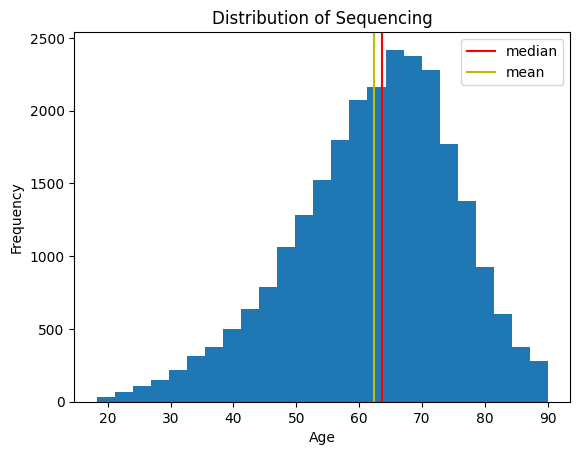

In [168]:
# Age at sequencing
plt.figure()
plt.hist(df_2['Age at Sequencing'], bins = 25)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Sequencing')

plt.axvline(df_2['Age at Sequencing'].median(), label='median', color='r')
plt.axvline(df_2['Age at Sequencing'].mean(), label='mean', color='y')

plt.legend()
plt.show()

In [169]:
#fill nulls from Average Age column
df_2['Age at Sequencing'].fillna(df_2['Average Age'], inplace=True)

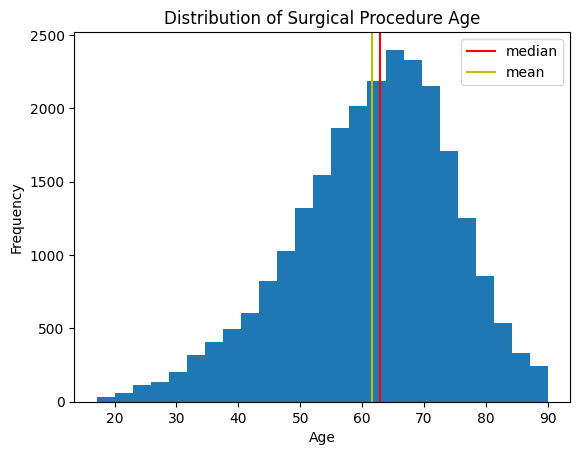

In [170]:
#Age at surgical procedure
plt.figure()
plt.hist(df_2['Age at Surgical Procedure'], bins = 25)
plt.xlabel('Age')
plt.title('Distribution of Surgical Procedure Age')
plt.ylabel('Frequency')

plt.axvline(df_2['Age at Surgical Procedure'].median(), label='median', color='r')
plt.axvline(df_2['Age at Surgical Procedure'].mean(), label='mean', color='y')

plt.legend()
plt.show()

In [171]:
df_2['Age at Surgical Procedure'].head(50)

0     37.03
1     44.42
2     61.00
3     74.64
4     71.58
5     79.50
6     75.55
7     64.30
8     66.77
9     51.46
10    67.16
11    63.07
12    73.57
13    70.38
14    58.06
15    49.39
16    62.12
17    62.10
18    78.60
19    61.14
20    63.04
21    63.34
22    58.53
23    76.88
24    67.96
25    64.71
26    64.74
27    18.39
28    50.26
29    57.39
30    55.88
31    73.62
32    65.42
33    61.87
34    60.08
35    62.89
36    63.64
37    62.05
38    46.15
39    57.60
40    67.86
41    52.71
42    46.85
43    28.83
44    71.17
45      NaN
46    59.61
47    57.88
48    57.38
49    46.16
Name: Age at Surgical Procedure, dtype: float64

In [172]:
#fill nulls from Average Age column
df_2['Age at Surgical Procedure'].fillna(df_2['Average Age'], inplace=True)

Next we will take a look at the Null values in the features that do not contain age information

In [173]:
#MSI score - how many null values?
df_2['MSI Score'].isna().sum()

2

In [174]:
#check the distribution of values 
df_2['MSI Score'].describe()

count    25773.000000
mean         1.285071
std          4.635967
min         -1.000000
25%          0.000000
50%          0.230000
75%          0.860000
max         53.440000
Name: MSI Score, dtype: float64

In [175]:
#check how they relate to MSI Type as MSI Type can be used to determine a more likely score
null_counts = df_2.groupby('MSI Type')['MSI Score'].apply(lambda x: x.isnull().sum())
null_counts

MSI Type
Do not report    1
Indeterminate    0
Instable         0
Stable           0
Name: MSI Score, dtype: int64

In [176]:
#fill nulls of MSI Score with mean
df_2['MSI Score'].fillna(df_2['MSI Score'].mean(), inplace = True)

**Observations:**

Since there were only 2 null values for MSI score, we filled these values in with the mean of the MSI score as it should not affect the distribution drastically.

---

Next we will look at the `MSI Type` column

In [177]:
#check the number of null values:
df_2['MSI Type'].isna().sum()

1

In [178]:
#check the categories in MSI Type
df_2['MSI Type'].value_counts()

MSI Type
Stable           21879
Do not report     2558
Indeterminate      714
Instable           623
Name: count, dtype: int64

**Findings:**

There seems to be a `Do Not Report` category and `Indeterminate`. To simplfy this feature and make it more meaningful we will covert the `Do Not Report`category to Indeterminate and add this null value to that category as they can be considered very similar categories. `Indeterminate` gives slightly more information as it means the tests were inconclusive.

In [179]:
#fill in null to indeterminate category
df_2['MSI Type'].fillna('Indeterminate', inplace = True)

In [180]:
#replace Do not Report with Indeterminate:
df_2['MSI Type'].replace({'Do not report':'Indeterminate'}, inplace=True)

In [181]:
# sanity check
df_2['MSI Type'].value_counts()

MSI Type
Stable           21879
Indeterminate     3273
Instable           623
Name: count, dtype: int64

**Observations:**

The null values in `MSI Type` have been replaced and I have also made the column more informative by replacing the `Do Not Report` Category with the `Indeterminate` category.

Next, we will check out the `Overall Survival (Months)` column. It contains 116 null values. This is a numerical column so lets check out the distribution

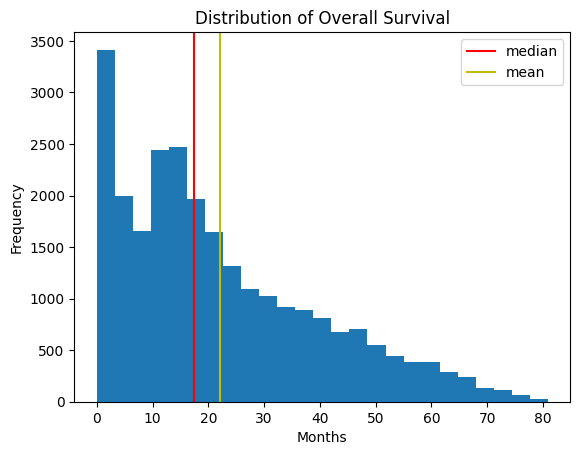

In [182]:
#plot histogram of Overall Survival
plt.figure()
plt.hist(df_2['Overall Survival (Months)'], bins = 25)
plt.xlabel('Months')
plt.title('Distribution of Overall Survival')
plt.ylabel('Frequency')

#Plot the Mean and Median
plt.axvline(df_2['Overall Survival (Months)'].median(), label='median', color='r')
plt.axvline(df_2['Overall Survival (Months)'].mean(), label='mean', color='y')

plt.legend()
plt.show()

In [183]:
df_2['Overall Survival (Months)'].describe()

count    25659.000000
mean        22.112903
std         17.695178
min          0.000000
25%          8.440000
50%         17.450000
75%         33.120000
max         80.890000
Name: Overall Survival (Months), dtype: float64

In [184]:
#check what the null values correspond to:
specific_value = '0:LIVING'

filtered_rows = df_2[(df_2['Overall Survival (Months)'].isna()) & (df_2['Overall Survival Status'] == specific_value)]
filtered_rows.shape

(115, 47)

**Findings:**

The null values in Overall Survival (Months) are mostly for patients who are still alive at the end of the study. There is 1 null value not accounted for. Since these pateints are living, I will fill in these values with the mean overall survival of the patients that are still living.

In [185]:
# set up a filter to filter rows for 0:LIVING
filtered_living = df_2[df_2['Overall Survival Status'] == '0:LIVING']

#find the mean overall survival
mean_survival_months = filtered_living['Overall Survival (Months)'].mean()
mean_survival_months

26.66572396875605

In [186]:
#fill nulls with the mean overall survival for those patients that are living
df_2['Overall Survival (Months)'].fillna(mean_survival_months, inplace=True)


In [187]:
#sanity check
df_2['Overall Survival (Months)'].isna().sum()

0

Next we will look at Primary Tumour Site, there are 2 null values in this column:

In [188]:
df_2['Primary Tumor Site'].value_counts()

Primary Tumor Site
Lung                             5041
Breast                           2612
Prostate                         2176
Pancreas                         1996
Colon                            1282
Uterus                           1232
Ovary                            1137
Bladder                           962
Rectum                            952
Skin                              732
Liver                             574
Stomach                           511
Sigmoid Colon                     475
Thyroid                           429
Kidney                            416
Esophagus                         352
Testis                            345
Ascending Colon                   245
Unknown                           231
Cecum                             228
Pleura                            216
Endometrium                       214
Rectosigmoid Colon                213
Appendix                          206
Soft Tissue                       193
Gallbladder                    

For these 2 patients, there is no value for the primary tumour site, however if you look at the value_counts, there is an unknown column, for now we will put the value as `Unknown`, by for future modeling, we may need to extrapolate the info from the `Organ System` and `Cancer Type` to fill in this unknown category if possible. There also seems to be a category that is `Unknown Primary`, that has 3 entries we will also add these to the `Unknown` category

In [189]:
#fill null values with unknown

df_2['Primary Tumor Site'].fillna('Unknown', inplace=True)

In [190]:
#replace Unknown Primary with Unknown:
df_2['Primary Tumor Site'].replace({'Unknown Primary':'Unknown'}, inplace=True)

Next, lets take a look at `Race Category` with 77 missing values:

In [191]:
#check the types of values
df_2['Race Category'].value_counts()

Race Category
White                             20263
Asian-far east/indian subcont      1787
Black or african american          1597
Pt refused to answer                903
Other                               596
No value entered                    396
Unknown                             111
Native american-am ind/alaska        34
Native hawaiian or pacific isl       11
Name: count, dtype: int64

As seen from the value_counts, there are a few unknown categories. There are `Pt refused to answer`, `Other`, `No value entered` and `Unknown`. I will be replacing all these entries into the `Other` category, where I will also place the null values. This will clean up the data set for this feature.

In [192]:
#fill nulls with Other
df_2['Race Category'].fillna('Other', inplace=True)

In [193]:
#Replace nondescriptive categories with Other

df_2['Race Category'].replace({'Pt refused to answer':'Other','No value entered':'Other','Unknown':'Other'}, inplace=True)

In [194]:
#sanity check
df_2['Race Category'].value_counts()

Race Category
White                             20263
Other                              2083
Asian-far east/indian subcont      1787
Black or african american          1597
Native american-am ind/alaska        34
Native hawaiian or pacific isl       11
Name: count, dtype: int64

Next we will look at `Tumor Purity` with 407 null values. We will first look at the distribution of values:


In [195]:
df_2['Tumor Purity'].value_counts()

Tumor Purity
30.0     5030
20.0     4235
40.0     3713
50.0     3121
60.0     2779
10.0     2682
70.0     1780
80.0     1286
90.0      352
15.0      105
25.0       92
75.0       50
35.0       41
65.0       34
85.0       23
5.0        14
45.0        9
95.0        8
55.0        6
100.0       3
0.0         3
11.0        1
16.0        1
Name: count, dtype: int64

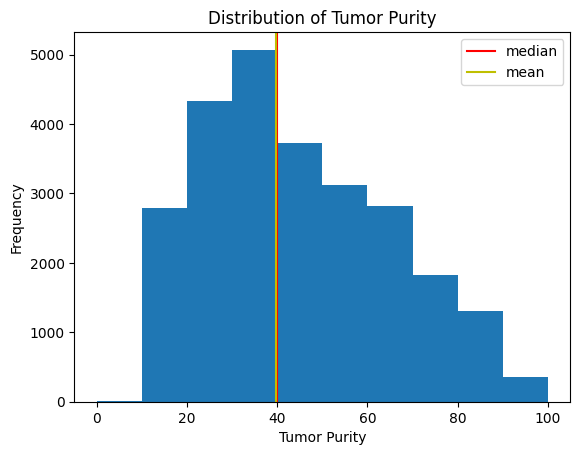

In [196]:
#plot histogram of Tumor Purity
plt.figure()
plt.hist(df_2['Tumor Purity'], bins = 10)
plt.xlabel('Tumor Purity')
plt.title('Distribution of Tumor Purity')
plt.ylabel('Frequency')

#Plot the Mean and Median
plt.axvline(df_2['Tumor Purity'].median(), label='median', color='r')
plt.axvline(df_2['Tumor Purity'].mean(), label='mean', color='y')

plt.legend()
plt.show()

From this distribution, we can see the mean and medians of `Tumor Purity` are very similar. We will replace the null values of `Tumor Purity` with the mean value

In [197]:
#fill in nulls with the mean for Tumor Purity feature
df_2['Tumor Purity'].fillna(df_2['Tumor Purity'].mean(), inplace=True)

In [198]:
#sanity check
df_2.isna().sum()

Sample ID                        0
Age at Sequencing                0
Age at Surgical Procedure        0
Cancer Type                      0
Cancer Type Detailed             0
Distant Mets: Adrenal Gland      0
Distant Mets: Biliary tract      0
Distant Mets: Bladder/UT         0
Distant Mets: Bone               0
Distant Mets: Bowel              0
Distant Mets: Breast             0
Distant Mets: CNS/Brain          0
Distant Mets: Distant LN         0
Distant Mets: Female Genital     0
Distant Mets: Head and Neck      0
Distant Mets: Intra-Abdominal    0
Distant Mets: Kidney             0
Distant Mets: Liver              0
Distant Mets: Lung               0
Distant Mets: Male Genital       0
Distant Mets: Mediastinum        0
Distant Mets: Ovary              0
Distant Mets: Pleura             0
Distant Mets: PNS                0
Distant Mets: Skin               0
Distant Mets: Unspecified        0
Fraction Genome Altered          0
Gene Panel                       0
Metastatic patient  

No null values remain!

## Finding Summary <a class="anchor" id="findings"></a>

The data has been assessed and cleaned by performing the following steps:

- Checking for duplicated or fully correlated rows and columns
- Removing one of each pair of fully correlated columns
- Dropping redundant or insignificant columns
- Dropping columns with a high proportion of null values
- Filling in null vlaues with the first iteration of appropriate values

Lets check the shape and a sample of the data before we save the data set to a new csv file.

In [98]:
#check the shape:
df_2.shape

(25775, 47)

The resulting clean data set is 25775 rows and 47 columns.

In [99]:
df_2.head()

,Sample ID,Age at Sequencing,Age at Surgical Procedure,Cancer Type,Cancer Type Detailed,Distant Mets: Adrenal Gland,Distant Mets: Biliary tract,Distant Mets: Bladder/UT,Distant Mets: Bone,Distant Mets: Bowel,Distant Mets: Breast,Distant Mets: CNS/Brain,Distant Mets: Distant LN,Distant Mets: Female Genital,Distant Mets: Head and Neck,Distant Mets: Intra-Abdominal,Distant Mets: Kidney,Distant Mets: Liver,Distant Mets: Lung,Distant Mets: Male Genital,Distant Mets: Mediastinum,Distant Mets: Ovary,Distant Mets: Pleura,Distant Mets: PNS,Distant Mets: Skin,Distant Mets: Unspecified,Fraction Genome Altered,Gene Panel,Metastatic patient,Met Count,Met Site Count,MSI Score,MSI Type,Oncotree Code,Organ System,Overall Survival (Months),Overall Survival Status,Primary Tumor Site,Race Category,Sample coverage,Sample Type,Sex,Subtype,Subtype Abbreviation,TMB (nonsynonymous),Tumor Purity,Average Age
0,P-0000004-T01-IM3,39.74,37.03,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,0.2782,IMPACT341,True,2,2,2.50,Stable,IDC,Breast,3.78,1:DECEASED,Breast,White,428,Primary,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,4.436621,50.0,39.1225
1,P-0000015-T01-IM3,44.44,44.42,Breast Cancer,Breast Invasive Ductal Carcinoma,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,0.3503,IMPACT341,True,8,8,2.55,Stable,IDC,Breast,13.90,1:DECEASED,Breast,White,281,Metastasis,Female,Breast Ductal HR+HER2-,IDC HR+HER2-,7.764087,40.0,44.6775
2,P-0000024-T01-IM3,61.33,61.00,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,Yes,No,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.3878,IMPACT341,True,8,5,0.72,Stable,UEC,Gynecologic,35.06,1:DECEASED,Uterus,White,1016,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,6.654932,40.0,61.5050
3,P-0000025-T02-IM5,74.81,74.64,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,Yes,0.1020,IMPACT410,True,13,8,0.15,Stable,USC,Gynecologic,46.00,1:DECEASED,Uterus,White,1147,Metastasis,Female,Uterine Serous,UCEC SEROUS,1.957439,30.0,73.9075
4,P-0000026-T01-IM3,71.72,71.58,Endometrial Cancer,Uterine Endometrioid Carcinoma,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,0.4196,IMPACT341,True,11,7,1.23,Stable,UEC,Gynecologic,80.59,0:LIVING,Uterus,Asian-far east/indian subcont,1222,Metastasis,Female,Uterine Endometrioid,UCEC ENDO,4.436621,10.0,72.5350


In [200]:
#save the data to a parquet
df_2.to_csv('cancer_data_clean.csv')

### Next Steps <a class="anchor" id="next"></a>

- EDA
- Feature Selection
- Model Selection
- Model Training
- Model Evaluation
- Model Deployment